In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from projects.imagenet.experiments import CONFIGS
from projects.imagenet.imagenet_experiment import ImagenetExperiment
from torch.optim.lr_scheduler import OneCycleLR

In [2]:
def compute_lr(exp):
    lr = []
    for epoch in range(exp.epochs):
        for batch in range(exp.steps_per_epoch):
            lr.append(exp.lr_scheduler.get_lr())

            # post batch
            if isinstance(exp.lr_scheduler, OneCycleLR):
                step = epoch * exp.steps_per_epoch + batch + 1
                exp.lr_scheduler.step(step)

        # post epoch
        if not isinstance(exp.lr_scheduler, OneCycleLR):
            exp.lr_scheduler.step(epoch)

    return lr

/Users/lscheinkman/miniconda3/envs/nupic.research/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


<IPython.core.display.Javascript object>


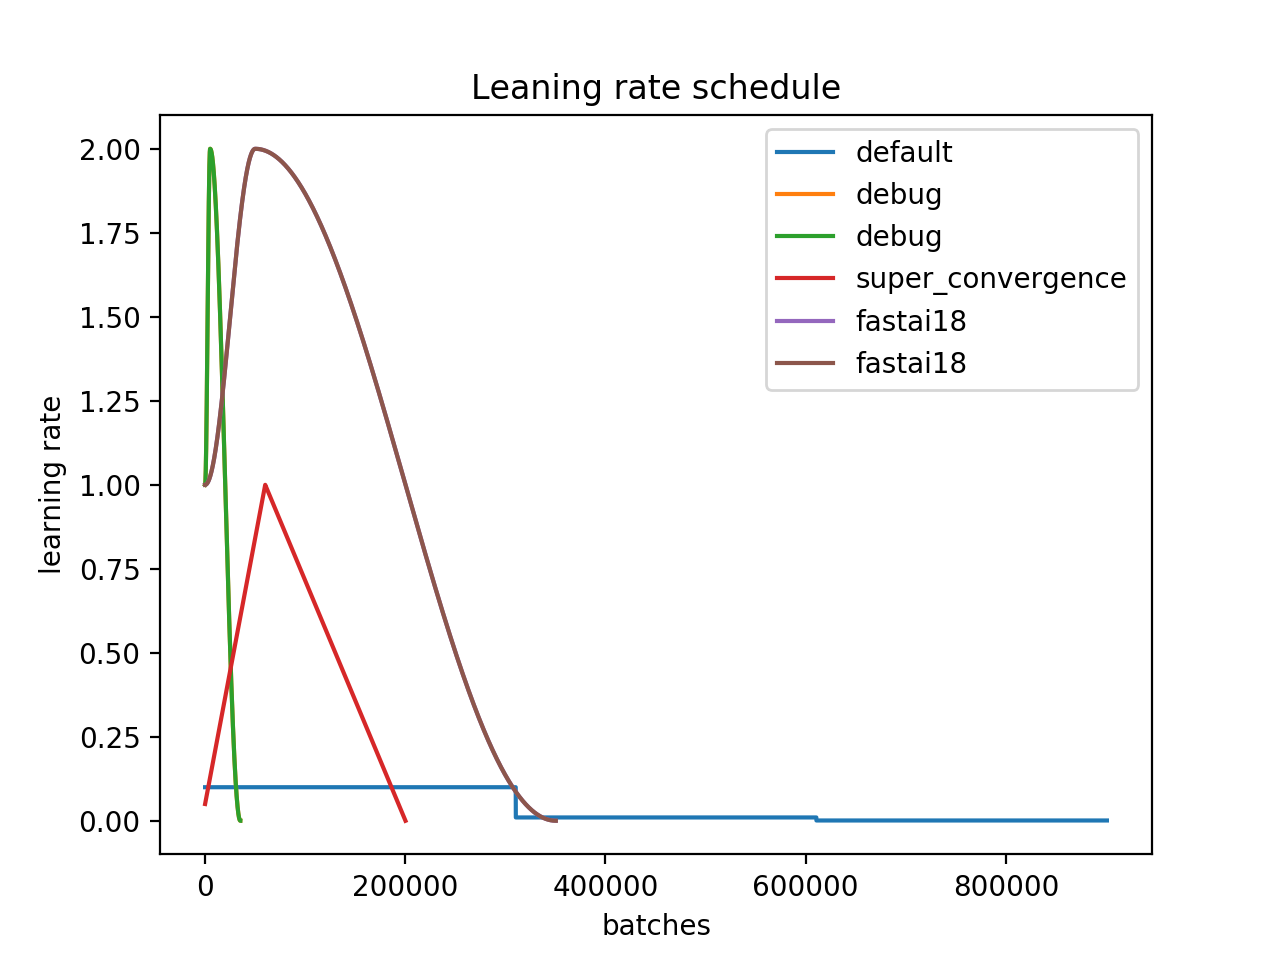

In [3]:
exp = ImagenetExperiment()
for name in CONFIGS.keys():
    exp.setup_experiment(CONFIGS[name])
    lr = compute_lr(exp)
    plt.plot(lr, label=name)

plt.title("Leaning rate schedule")
plt.xlabel("batches")
plt.ylabel("learning rate")
plt.legend()
plt.show()